In [81]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

### Indian city with highest number of fundings

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


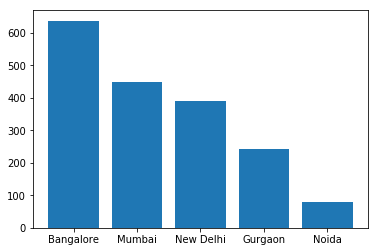

In [96]:
pd.options.mode.chained_assignment = None
cities = {"Bangalore", "Mumbai", "Gurgaon", "Noida", "New Delhi"}
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader['CityLocation'].dropna(inplace = True)
    reader['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
    reader['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
    location = reader['CityLocation']
    location = list(map(str.strip, location))
    location = list(map(str.rstrip, location))
    d = {}
    for i in location:
        if('/' in i):
            k = i.split('/')
            k = list(map(str.strip, k))
            k = list(map(str.rstrip, k))
            for i in range(2):
                if(k[i] in cities):
                    if(k[i] in d):
                        d[k[i]] += 1
                    else:
                        d[k[i]] = 1
        else:
            i = i.strip().rstrip()
            if(i in cities):
                if(i in d):
                    d[i] += 1
                else:
                    d[i] = 1
    x = []
    y = []
    for i in d:
        print(i, d[i])
        x.append(i)
        y.append(d[i])
    plt.bar(x, y)
    plt.show()


### Top Investors

In [87]:
cities = {"Bangalore", "Mumbai", "Gurgaon", "Noida", "New Delhi"}
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
    reader['CityLocation'].dropna(inplace = True)
    df = reader[['CityLocation', 'InvestorsName']]
    df['CityLocation'].dropna(inplace = True)
    df['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
    df['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
    d= {}
    for index, row in df.iterrows():
        if(type(row['CityLocation']) == float or type(row['InvestorsName']) == float):
            continue;
        location = row['CityLocation']
        inves = row['InvestorsName'].split(',')
        location = location.strip().rstrip()
        inves = list(map(str.strip, inves))
        inves = list(map(str.rstrip, inves))
        inves = list(map(str.title, inves))
        if('/' in location):
            k = location.split('/')
            k = list(map(str.strip, k))
            k = list(map(str.rstrip, k))
            for i in range(2):
                if(k[i] in cities):
                    for j in inves:
                        if(j == "Undisclosed Investors" or j == "") :
                            continue
                        if(j in d):
                            d[j] += 1
                        else :
                            d[j] = 1
        if(location in cities):
            for i in inves:
                if(i == "Undisclosed Investors" or i == ""):
                    continue
                if(i in d):
                    d[i] += 1
                else:
                    d[i] = 1
#     for i in d:
#         print(i, d[i])
k = Counter(d) 
high = k.most_common(5)  
for i in high:
    print(i[0], i[1])

Sequoia Capital 52
Accel Partners 44
Saif Partners 37
Blume Ventures 36
Kalaari Capital 32


### Top Investors(Improvised)

In [155]:
pd.options.mode.chained_assignment = None
cities = {"Bangalore", "Mumbai", "Gurgaon", "Noida", "New Delhi"}
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
#     reader = reader[pd.notna(reader['CityLocation'])]
#     reader = reader[pd.notna(reader['InvestorsName'])]
#     reader = reader[pd.notna(reader['StartupName'])]
    reader['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
    reader['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
    reader['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
    reader['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
    reader['StartupName'].replace("Olacabs", "Ola",inplace = True)
    reader['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
    reader = reader[pd.notnull(reader['CityLocation'])]
    reader = reader[pd.notnull(reader['InvestorsName'])]
    reader = reader[pd.notnull(reader['StartupName'])]
    
    d = {}
    visited = set()
    
    for index, row in reader.iterrows():
        location = row['CityLocation']
        inves = row['InvestorsName'].split(',')
        company = row['StartupName'];
        location = location.strip().rstrip()
        inves = list(map(str.strip, inves))
        inves = list(map(str.rstrip, inves))
        inves = list(map(str.title, inves))
        if('/' in location):
            k = location.split('/')
            k = list(map(str.strip, k))
            k = list(map(str.rstrip, k))
            for i in range(2):
                if(k[i] in cities):
                    for j in inves:
                        if(j == "Undisclosed Investors" or j == "") :
                            continue
                        if((j+company) in visited):
                            continue;
                        if(j in d):
                            d[j] += 1
                        else :
                            d[j] = 1
                        visited.add(j+company)
        if(location in cities):
            for i in inves:
                if(i == "Undisclosed Investors" or i == ""):
                    continue
                if((i+company) in visited):
                    continue;
                if(i in d):
                    d[i] += 1
                else:
                    d[i] = 1
                visited.add(i+company)
# print(d)
k = Counter(d) 
high = k.most_common(5)  
for i in high:
    print(i[0], i[1])

Sequoia Capital 40
Accel Partners 38
Blume Ventures 32
Indian Angel Network 32
Kalaari Capital 30


### Investors on the basis of type of investment

In [164]:
pd.options.mode.chained_assignment = None
cities = {"Bangalore", "Mumbai", "Gurgaon", "Noida", "New Delhi"}
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
#     reader = reader[pd.notna(reader['CityLocation'])]
#     reader = reader[pd.notna(reader['InvestorsName'])]
#     reader = reader[pd.notna(reader['StartupName'])]
    reader['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
    reader['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
    reader['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
    reader['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
    reader['StartupName'].replace("Olacabs", "Ola",inplace = True)
    reader['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
    reader['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace = True)
    reader['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace = True)
    reader['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace = True)
    reader = reader[pd.notnull(reader['CityLocation'])]
    reader = reader[pd.notnull(reader['InvestorsName'])]
    reader = reader[pd.notnull(reader['StartupName'])]
    
    d = {}
    visited = set()
    
    for index, row in reader.iterrows():
        if(row['InvestmentType'] == "Seed Funding" or row['InvestmentType'] == 'Crowd Funding'):
            
            location = row['CityLocation']
            inves = row['InvestorsName'].split(',')
            company = row['StartupName'];
            location = location.strip().rstrip()
            inves = list(map(str.strip, inves))
            inves = list(map(str.rstrip, inves))
            inves = list(map(str.title, inves))
            if('/' in location):
                k = location.split('/')
                k = list(map(str.strip, k))
                k = list(map(str.rstrip, k))
                for i in range(2):
                    if(k[i] in cities):
                        for j in inves:
                            if(j == "Undisclosed Investors" or j == "" or j == "Undisclosed Investor") : 
                                continue
                            if((j+company) in visited):
                                continue;
                            if(j in d):
                                d[j] += 1
                            else :
                                d[j] = 1
                            visited.add(j+company)
            if(location in cities):
                for i in inves:
                    if(i == "Undisclosed Investors" or i == "" or i == "Undisclosed Investor"):
                        continue
                    if((i+company) in visited):
                        continue;
                    if(i in d):
                        d[i] += 1
                    else:
                        d[i] = 1
                    visited.add(i+company)
# print(d)
k = Counter(d) 
high = k.most_common(5)  
for i in high:
    print(i[0], i[1])

Indian Angel Network 25
Rajan Anandan 20
Kunal Shah 13
Letsventure 13
Anupam Mittal 13


### Private Equity Investors

In [166]:
pd.options.mode.chained_assignment = None
cities = {"Bangalore", "Mumbai", "Gurgaon", "Noida", "New Delhi"}
with open("startup_funding.csv") as file_obj:
    reader = pd.read_csv(file_obj)
#     reader = reader[pd.notna(reader['CityLocation'])]
#     reader = reader[pd.notna(reader['InvestorsName'])]
#     reader = reader[pd.notna(reader['StartupName'])]
    reader['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
    reader['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
    reader['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
    reader['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
    reader['StartupName'].replace("Olacabs", "Ola",inplace = True)
    reader['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
    reader['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
    reader['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
    reader['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace = True)
    reader['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace = True)
    reader['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace = True)
    reader = reader[pd.notnull(reader['CityLocation'])]
    reader = reader[pd.notnull(reader['InvestorsName'])]
    reader = reader[pd.notnull(reader['StartupName'])]
    
    d = {}
    visited = set()
    
    for index, row in reader.iterrows():
        if(row['InvestmentType'] == "Private Equity"):
            
            location = row['CityLocation']
            inves = row['InvestorsName'].split(',')
            company = row['StartupName'];
            location = location.strip().rstrip()
            inves = list(map(str.strip, inves))
            inves = list(map(str.rstrip, inves))
            inves = list(map(str.title, inves))
            if('/' in location):
                k = location.split('/')
                k = list(map(str.strip, k))
                k = list(map(str.rstrip, k))
                for i in range(2):
                    if(k[i] in cities):
                        for j in inves:
                            if(j == "Undisclosed Investors" or j == "" or j == "Undisclosed Investor") : 
                                continue
                            if((j+company) in visited):
                                continue;
                            if(j in d):
                                d[j] += 1
                            else :
                                d[j] = 1
                            visited.add(j+company)
            if(location in cities):
                for i in inves:
                    if(i == "Undisclosed Investors" or i == "" or i == "Undisclosed Investor"):
                        continue
                    if((i+company) in visited):
                        continue;
                    if(i in d):
                        d[i] += 1
                    else:
                        d[i] = 1
                    visited.add(i+company)
# print(d)
k = Counter(d) 
high = k.most_common(5)  
for i in high:
    print(i[0], i[1])

Sequoia Capital 38
Accel Partners 34
Kalaari Capital 26
Blume Ventures 24
Saif Partners 24
